NAME- KIRAN KONDISETTI

UIN-430000208

PROJECT Title- Simulation Model to Determine StaffingStrategy and Warehouse Capacity for aDistribution Center

SIMULATION MODEL

In [1]:
from scipy.stats import poisson
def simulation_model(max_stock,x):
  #defining the variables
  life_of_product=80
  available_stock=max_stock 
  stocks =[0]*(life_of_product+1)
  stocks[-1] = max_stock 
  stock_arrival=5
  required_exp_date=30
  demand = 0
  unfullfilled_days=0
  wastage_array=[]
  wastage=0
  for m in range(91):
    for i in range(stock_arrival):
      #calculating the wastage in the process and appending it into the array
      wastage += sum(stocks[:required_exp_date])
      wastage_array.append(wastage)
      # simulating the distribution of the demand
      day_demand = poisson.rvs(mu=150)
      demand+= day_demand
      available_stock -= wastage
      # when avaialable stock is less than daydemand
      if available_stock < day_demand:
        unfullfilled_days += 1
        available_stock = 0
      else:
        available_stock-=day_demand
      #discarding the stock have expiry date less than or equal to 30
      for j in range(len(stocks)-1,required_exp_date-1,-1):
        if stocks[j] >= day_demand:
          stocks[j] -= day_demand
          day_demand = 0
          break
        else:
          day_demand -= stocks[j]
          stocks[j] = 0
      for k in range(1, len(stocks)):
        stocks[k-1] = stocks[k]
      stocks[-1] = 0
    if available_stock == 0:
      stocks[-1] = max_stock
    #calculating the wastage
    else:
      stocks[-1] = demand + wastage
    wastage = 0
    for l in range(required_exp_date):
      stocks[l] = 0
    available_stock = max_stock
  #returning the metrics
  return   wastage_array,unfullfilled_days



SIMULATING THE MODEL OVER VARYING WAREHOUSE CAPACITY

In [2]:
max_stock = [400,450,500,550,600,650,700,750,800,850,900,950,1000,1100,1200,1300,1400]
stock_arrival = [5]
results=[]
temp = []
for i in range(len(max_stock)):
  for j in range(len(stock_arrival)):
    a,b = simulation_model(max_stock[i],stock_arrival[j])
    temp.append([sum(a),b])
  results.append(temp)
  temp=[]
  
   


GRAPHS

In [3]:
wastage_graph=[]
unfulfilled_graph=[]
for i in range(len(max_stock)):
  for j in range(len(stock_arrival)):
    wastage_graph.append(results[i][j][0])
    unfulfilled_graph.append(results[i][j][1])

    


WAREHOUSE CAPACITY VS WASTAGE STOCK

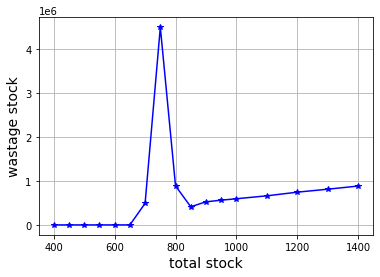

In [4]:
import matplotlib.pyplot as plt
plt.plot(max_stock, wastage_graph, '*-b')
plt.xlabel('total stock', fontsize=14)
plt.ylabel('wastage stock', fontsize=14)
plt.grid(True)
plt.show()

WAREHOUSE CAPACITY VS UNFULFILLED DAYS

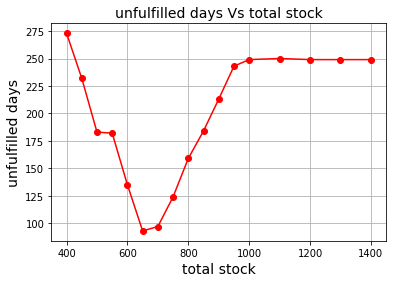

In [5]:
import matplotlib.pyplot as plt
plt.plot(max_stock, unfulfilled_graph, color='red', marker='o')
plt.title('unfulfilled days Vs total stock', fontsize=14)
plt.xlabel('total stock', fontsize=14)
plt.ylabel('unfulfilled days', fontsize=14)
plt.grid(True)
plt.show()

3D GRAPH

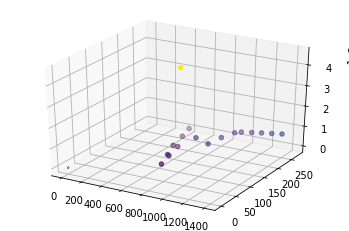

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
zdata = max_stock
xdata = wastage_graph
ydata = unfulfilled_graph
ax.scatter3D(zdata, ydata, xdata, c=xdata);

MODEL TO SIMULATE POINT ESTIMATES

In [7]:
from scipy.stats import poisson
def simulation_model_pe(max_stock,stock_arrival):
  wastage_pe=[]
  unfullfilled_pe=[]
  life_of_product=80
  available_stock=max_stock 
  stocks =[0]*(life_of_product+1)
  stocks[-1] = max_stock 
  stock_arrival=5
  required_exp_date=30
  demand = 0
  unfullfilled_days=0
  wastage_array=[]
  wastage=0
  for z in range(100):
    for m in range(91):
      for i in range(stock_arrival):
        #calculating the wastage in the process and appending it into the array
        wastage += sum(stocks[:required_exp_date])
        wastage_array.append(wastage)
        # simulating the distribution of the demand
        day_demand = poisson.rvs(mu=150)
        demand+= day_demand
        available_stock -= wastage
        # when avaialable stock is less than daydemand
        if available_stock < day_demand:
          unfullfilled_days += 1
          available_stock = 0
        else:
          available_stock-=day_demand
        #discarding the stock have expiry date less than or equal to 30
        for j in range(len(stocks)-1,required_exp_date-1,-1):
          if stocks[j] >= day_demand:
            stocks[j] -= day_demand
            day_demand = 0
            break
          else:
            day_demand -= stocks[j]
            stocks[j] = 0
        for k in range(1, len(stocks)):
          stocks[k-1] = stocks[k]
        stocks[-1] = 0
      if available_stock == 0:
        stocks[-1] = max_stock
      #Calculating the wastage
      else:
        stocks[-1] = demand + wastage
      wastage = 0
      for l in range(required_exp_date):
        stocks[l] = 0
      available_stock = max_stock
    wastage_pe.append(sum(wastage_array))
    wastage_array=[]
    unfullfilled_pe.append(unfullfilled_days)
    unfulfilled_days=0
  return   wastage_pe,unfullfilled_pe


In [8]:
wastage_pe,unfullfilled_pe= simulation_model(850,5)

In [9]:
import scipy.stats as stats
import math
mean=np.mean(wastage_pe)
z = stats.norm.ppf(q=0.975)
x= z*(np.std(wastage_pe))/math.sqrt(100)
ci = (mean-x,mean+x)
print('the expected average wastage',mean)
print('95% confidence interval',ci)

the expected average wastage 1091.1868131868132
95% confidence interval (353.53769387003535, 1828.835932503591)


In [ ]:
import scipy.stats as stats
import math
mean=np.mean(unfullfilled_pe)
z = stats.norm.ppf(q=0.975)
x= z*(np.std(unfullfilled_pe))/math.sqrt(100)
ci = (mean-x,mean+x)
print('the expected average wastage',mean)
print('95% confidence interval',ci)